## Business Understanding
### We need to understand the factors contributing to the success of startups in india ecosystem. 


### Hypothesis:
* H0: Sector does not really contribute to the success of a Startup in India.
* H1: Sector can contribute to the success of a Startup in India.


## Data Understanding
* The data we have is from years 2018 to 2021 from various startups in India and the amounts funded.
* Through analysing the data we should be able to get a better insight into the ecosystem and the contributing factors.

#ASSUMPTIONS:

* Amount for 2019 dataset is all in $
* 1 dollar = 70 INR in 2018

In [451]:
# importing libraries

from sqlalchemy import create_engine
from dotenv import dotenv_values
import os
import pandas as pd
import pyodbc
import numpy as np
import re
import csv
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore', category=UserWarning)



### creating the login credentials

In [400]:
# creating the login credentials

credentials = dotenv_values('.env')

USERNAME = credentials["USER"]
PASSWORD = credentials["PASS"]
SERV = credentials["SERVER"]
DB_NAME  = credentials["DBNAME"]

### Connection to the Database

In [401]:
connection = f"DRIVER={{SQL Server}};SERVER={SERV};DATABASE={DB_NAME};UID={USERNAME};PWD={PASSWORD}"  # Connection to the Database

In [402]:
conn = pyodbc.connect(connection)

### To test connection

In [403]:
# To test connection

query20 = "SELECT * FROM dbo.LP1_startup_funding2020"
query21 = "SELECT * FROM dbo.LP1_startup_funding2021"


In [404]:
# To read the data

df2018 = pd.read_csv('startup_funding2018.csv')
df19 = pd.read_csv('startup_funding2019.csv')
df20 = pd.read_sql(query20,conn)
df21 = pd.read_sql(query20,conn)

### Peek at the Tables

In [405]:
df21.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [406]:
df20.tail(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None
1054,Pando,2017.0,Chennai,Logitech,Networked logistics management software,"Jayakrishnan, Abhijeet Manohar",Chiratae Ventures,9000000.0,Series A,None


In [407]:
df19.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding


In [408]:
df2018.head(3) 

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


# DATA CLEANING

### Check for duplicates

In [409]:
df2018.duplicated().sum()

1

In [410]:
df19.duplicated().sum()

0

In [411]:
df20.duplicated().sum()

3

In [412]:
df21.duplicated().sum()

3

### Drop the duplicates

In [413]:
clean_2018= df2018.drop_duplicates()
clean_20= df20.drop_duplicates()
clean_21= df21.drop_duplicates()

# DATA CLEANING

### Rename columns in 2018

In [414]:
clean_2018.rename(columns={'Company Name':'Company_Brand','Industry':'Sector','Round/Series':'Stage','Location':'HeadQuarter','About Company':'What it does'} ,inplace=True)
clean_2018 = clean_2018.assign(Funding_Year = 2018) 
clean_2018.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3668\1320793531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2018.rename(columns={'Company Name':'Company_Brand','Industry':'Sector','Round/Series':'Stage','Location':'HeadQuarter','About Company':'What it does'} ,inplace=True)


,Company_Brand,Sector,Stage,Amount,HeadQuarter,What it does,Funding_Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


### Rename columns in 2019

In [415]:
df19.rename(columns={'Company/Brand':'Company_Brand','Amount($)':'Amount'},inplace=True)
df19 = df19.assign(Funding_Year = 2019) 
df19.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount,Stage,Funding_Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019


In [416]:
# To check for null and dtypes

df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount         89 non-null     object 
 8   Stage          43 non-null     object 
 9   Funding_Year   89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [417]:
# To check the values in the Amount column

df19['Amount'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [418]:
clean_20 =  clean_20.assign(Funding_Year = 2020) 
clean_21 =  clean_21.assign(Funding_Year = 2021) 

### Select the columns from Tables to use in the dataframe

In [419]:
df21_c = clean_21[['Company_Brand',	'Funding_Year','HeadQuarter','Sector','Amount','Stage']]
df20_c = clean_20[['Company_Brand',	'Funding_Year','HeadQuarter','Sector','Amount','Stage']]
df19_c = df19[['Company_Brand', 'Funding_Year','HeadQuarter','Sector','Amount','Stage']]
df18_c = clean_2018[['Company_Brand','Funding_Year','HeadQuarter','Sector','Amount','Stage']]

### Concatinate The tables

In [420]:
combine= pd.concat([df18_c,df19_c,df20_c,df21_c],ignore_index=True)

combine.head()

,Company_Brand,Funding_Year,HeadQuarter,Sector,Amount,Stage
0,TheCollegeFever,2018,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...",250000,Seed
1,Happy Cow Dairy,2018,"Mumbai, Maharashtra, India","Agriculture, Farming","₹40,000,000",Seed
2,MyLoanCare,2018,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace","₹65,000,000",Series A
3,PayMe India,2018,"Noida, Uttar Pradesh, India","Financial Services, FinTech",2000000,Angel
4,Eunimart,2018,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",—,Seed


In [421]:
#combine.Sector.title()

In [422]:
#combine['Amount'].unique()

In [423]:
# To check the fill in the null values

df_combine = combine.replace('Undisclosed',0, inplace=True)
df_combine = combine.replace('—',0)


In [424]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  2718 non-null   object
 1   Funding_Year   2718 non-null   int64 
 2   HeadQuarter    2511 non-null   object
 3   Sector         2687 non-null   object
 4   Amount         2212 non-null   object
 5   Stage          1748 non-null   object
dtypes: int64(1), object(5)
memory usage: 127.5+ KB


### To check for the null Values in the Concataned table

In [425]:
df_combine.isna().sum()

Company_Brand      0
Funding_Year       0
HeadQuarter      207
Sector            31
Amount           506
Stage            970
dtype: int64

In [426]:
df_combine.describe().T

,count,mean,std,min,25%,50%,75%,max
Funding_Year,2718.0,2019.967991,1.091712,2018.0,2020.0,2020.0,2021.0,2021.0


### To fill in the Null values in each column

In [427]:
df_combine.fillna(value={'Sector':'Unknown','Stage':'Unknown','Amount':0,'HeadQuarter':'Unknown','What it does':'Unknown'},inplace=True)

In [428]:
# To check if the nulls have been handled

df_combine.isna().sum()

Company_Brand    0
Funding_Year     0
HeadQuarter      0
Sector           0
Amount           0
Stage            0
dtype: int64

# Clean the 'Amount' Column

### To convert the Amount Column to one currency

In [429]:
# A function to convert the currrency

def currency(row):
    # 1 USD = 70 INR

    # Check if the Amount starts with '₹'
    if str(row['Amount']).startswith('₹'):
        return float(str(row['Amount']).replace('₹', '').replace(',', '')) / 70
    # Check if the Amount starts with '$'
    elif str(row['Amount']).startswith('$'):
        return float(str(row['Amount']).replace('$', '').replace(',', ''))

    else:
        return float(str(row['Amount']).replace(',', '')) / 70

### To call the function

In [430]:
df_combine['Amount'] = df_combine.apply(currency, axis=1)
df_combine['Amount'] = df_combine['Amount'].round(2)

In [431]:
# To have a peek to show the table

df_combine.head()

,Company_Brand,Funding_Year,HeadQuarter,Sector,Amount,Stage
0,TheCollegeFever,2018,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...",3571.43,Seed
1,Happy Cow Dairy,2018,"Mumbai, Maharashtra, India","Agriculture, Farming",571428.57,Seed
2,MyLoanCare,2018,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",928571.43,Series A
3,PayMe India,2018,"Noida, Uttar Pradesh, India","Financial Services, FinTech",28571.43,Angel
4,Eunimart,2018,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",0.00,Seed


### To Rename the Amount Column to show currency

In [432]:
df_combine.rename(columns={'Amount':'Amount($)'},inplace=True)
df_combine.head()

,Company_Brand,Funding_Year,HeadQuarter,Sector,Amount($),Stage
0,TheCollegeFever,2018,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...",3571.43,Seed
1,Happy Cow Dairy,2018,"Mumbai, Maharashtra, India","Agriculture, Farming",571428.57,Seed
2,MyLoanCare,2018,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",928571.43,Series A
3,PayMe India,2018,"Noida, Uttar Pradesh, India","Financial Services, FinTech",28571.43,Angel
4,Eunimart,2018,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",0.00,Seed


# Cleaning the 'Stage' Column

In [433]:
df_combine['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 0,
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', 'Unknown',
       'Fresh funding', 'Pre series A', 'Series G', 'Post series A',
       'Seed funding', 'Seed fund', 'Series F', 'Series B+', 'Seed round',
       'Pre-series A', 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Seed Round', 'Bridge Round', 'Pre seed round

In [434]:
df_combine['Stage'] = df_combine['Stage'].str.title()  #To change the name to one uppercase

### To handle the nan's and speacial strings

In [435]:
df_combine['Stage'] = df_combine['Stage'].replace({'Https://Docs.Google.Com/Spreadsheets/D/1X9Zineaz6Aunchihnmi8U6Ks7Kntr3Byy_Ybgfqaoua/Edit#Gid=1861303593':'Unknown'})
df_combine['Stage'] =  df_combine['Stage'].fillna('Unknown')
df_combine['Stage'] =  df_combine['Stage'].str.replace('-',' ')

In [436]:
df_combine['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre Seed',
       'Private Equity', 'Venture   Series Unknown', 'Grant',
       'Debt Financing', 'Post Ipo Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Unknown', 'Series D',
       'Secondary Market', 'Post Ipo Equity', 'Non Equity Assistance',
       'Funding Round', 'Fresh Funding', 'Pre Series A', 'Series G',
       'Post Series A', 'Seed Funding', 'Seed Fund', 'Series F',
       'Series B+', 'Seed Round', 'Pre Series', 'Debt', 'Pre Series C',
       'Pre Series B', 'Bridge', 'Series B2', 'Pre  Series A', 'Edge',
       'Seed A', 'Series A 1', 'Pre Seed Round', 'Seed Round & Series A',
       'Angel Round', 'Pre Series A1', 'Series E2', 'Bridge Round',
       'Seed Investment', 'Series D1', 'Mid Series', 'Series C, D'],
      dtype=object)

### To Categorize the Stage column to major Stages(Pre-seed, Seed, Debt, Series, Unknown, Others)

In [437]:
# Function for grouping

def Stage(row):

    if  'Pre Seed' in str(row['Stage']) or 'Bridge' in str(row['Stage']):
        return 'Pre-Seed'
    if 'Pre Series' in str(row['Stage']):
        return 'Pre-Series'
    if 'Seed' in str(row['Stage']) or 'Grant' in str(row['Stage']) or 'Corp' in str(row['Stage']):
        return 'Seed'
    if 'Debt' in str(row['Stage']):
        return 'Debt'
    if 'Series' in str(row['Stage']):
        return 'Series'
    if 'Unknown' in str(row['Stage']):
        return 'Unknown'
    if 'Equity' in str(row['Stage']) or 'Angel' in str(row['Stage']):
        return 'Equity'
    else:
        return 'Others'

    


In [438]:
# Call the function

df_combine['Funding'] = df_combine.apply(lambda row: Stage(row), axis=1)
#df_combine['Stage'] = df_combine.apply(lambda row: Stage(row), axis=1)


In [439]:
# Confirm the Function worked

df_combine.head(10)

,Company_Brand,Funding_Year,HeadQuarter,Sector,Amount($),Stage,Funding
0,TheCollegeFever,2018,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...",3571.43,Seed,Seed
1,Happy Cow Dairy,2018,"Mumbai, Maharashtra, India","Agriculture, Farming",571428.57,Seed,Seed
2,MyLoanCare,2018,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace",928571.43,Series A,Series
3,PayMe India,2018,"Noida, Uttar Pradesh, India","Financial Services, FinTech",28571.43,Angel,Equity
4,Eunimart,2018,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",0.00,Seed,Seed
5,Hasura,2018,"Bengaluru, Karnataka, India","Cloud Infrastructure, PaaS, SaaS",22857.14,Seed,Seed
6,Tripshelf,2018,"Kalkaji, Delhi, India","Internet, Leisure, Marketplace",228571.43,Seed,Seed
7,Hyperdata.IO,2018,"Hyderabad, Andhra Pradesh, India",Market Research,714285.71,Angel,Equity
8,Freightwalla,2018,"Mumbai, Maharashtra, India","Information Services, Information Technology",0.00,Seed,Seed
9,Microchip Payments,2018,"Bangalore, Karnataka, India",Mobile Payments,0.00,Seed,Seed


# To clean the 'HeadQuarter' Column

In [440]:
# Split the strings from the comma(,) then return the first index of the string 

df_combine['HeadQuarter'] = df_combine['HeadQuarter'].str.split(',').str[0]

In [441]:
# Confirm its worked

df_combine.head()

,Company_Brand,Funding_Year,HeadQuarter,Sector,Amount($),Stage,Funding
0,TheCollegeFever,2018,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...",3571.43,Seed,Seed
1,Happy Cow Dairy,2018,Mumbai,"Agriculture, Farming",571428.57,Seed,Seed
2,MyLoanCare,2018,Gurgaon,"Credit, Financial Services, Lending, Marketplace",928571.43,Series A,Series
3,PayMe India,2018,Noida,"Financial Services, FinTech",28571.43,Angel,Equity
4,Eunimart,2018,Hyderabad,"E-Commerce Platforms, Retail, SaaS",0.00,Seed,Seed


# Clean the 'Sector' Column

In [442]:
df_combine['Sector'].unique()
df_combine['Sector'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2718 entries, 0 to 2717
Series name: Sector
Non-Null Count  Dtype 
--------------  ----- 
2718 non-null   object
dtypes: object(1)
memory usage: 21.4+ KB


In [452]:
df_combine['Sector'] = df_combine['Sector'].str.lower()

df_combine['Sector'].unique()

array(['brand marketing, event promotion, marketing, sponsorship, ticketing',
       'agriculture, farming',
       'credit, financial services, lending, marketplace',
       'financial services, fintech',
       'e-commerce platforms, retail, saas',
       'cloud infrastructure, paas, saas',
       'internet, leisure, marketplace', 'market research',
       'information services, information technology', 'mobile payments',
       'b2b, shoes', 'internet',
       'apps, collaboration, developer platform, enterprise software, messaging, productivity tools, video chat',
       'food delivery', 'industrial automation',
       'automotive, search engine, service industry',
       'finance, internet, travel',
       'accounting, business information systems, business travel, finance, saas',
       'artificial intelligence, product search, saas, service industry, software',
       'internet of things, waste management',
       'air transportation, freight service, logistics, marine transport

In [453]:
def Sec(row):
    
    df_combine['Sector'] = df_combine['Sector'].str.lower()


    if 'tech' in str(row['Sector']) or 'intern' in str(row['Sector']) or 'video' in str(row['Sector']) or 'data' in str(row['Sector']) or 'app' in str(row['Sector']):
        return 'Technology'
    if 'financ' in str(row['Sector']) or 'sourc' in str(row['Sector']) or 'currenc' in str(row['Sector']) or 'bank' in str(row['Sector']) or 'pay' in str(row['Sector']):
        return 'Finance'
    if 'capital' in str(row['Sector']) or 'tax' in str(row['Sector']):
        return 'Finance' 
    if 'educat' in str(row['Sector']):
        return 'Education'
    if 'trans' in str(row['Sector']) or 'auto' in str(row['Sector']) or 'car' in str(row['Sector']) or 'logistics' in str(row['Sector']):
        return 'Transportation'
    if 'care' in str(row['Sector']) or 'healt' in str(row['Sector']) or 'fitness' in str(row['Sector']) or 'pharmacy' in str(row['Sector']) :
        return 'Health'
    if 'network' in str(row['Sector']):
        return 'Networking'
    if 'inter' in str(row['Sector']) or 'living' in str(row['Sector']) or 'house' in str(row['Sector']) or 'real' in str(row['Sector']) or 'design' in str(row['Sector']):
        return 'Real Estate'
    if 'social' in str(row['Sector']) or 'entertai' in str(row['Sector']) or 'wellness' in str(row['Sector']):
        return 'Social'
    if 'food' in str(row['Sector']) or 'beverage' in str(row['Sector']) or 'nutrition' in str(row['Sector']) or 'tea' in str(row['Sector']):
        return 'Restaurant'
    if 'b2b' in str(row['Sector']):
        return 'B2B'
    if 'fashion' in str(row['Sector']) or 'beaut' in str(row['Sector']) or 'cosmetic' in str(row['Sector']):
        return 'Beauty'
    if 'sports' in str(row['Sector']) or 'beaut' in str(row['Sector']):
        return 'Sports'
    if 'management' in str(row['Sector']) or 'beaut' in str(row['Sector']):
        return 'Management'
    if 'solution' in str(row['Sector']):
        return 'Solutions'
    if 'saas' in str(row['Sector']) or 'software' in str(row['Sector']):
        return 'SaaS'
    if 'marketing' in str(row['Sector']) or 'sales' in str(row['Sector']):
        return 'Marketing'
    if 'farmi' in str(row['Sector']) or 'culture' in str(row['Sector']):
        return 'Farming'
    if 'artifi' in str(row['Sector']) or 'ai' in str(row['Sector']):
        return 'AI'
    if 'research' in str(row['Sector']):
        return 'Research'
    else:
        return 'Others'

In [454]:
df_combine['Category'] = df_combine.apply(Sec, axis=1)
#df_combine['Sector'] = df_combine.apply(Sec, axis=1)

In [472]:
df_combine.head(10)

,Company_Brand,Funding_Year,HeadQuarter,Sector,Amount($),Stage,Funding,Category
0,TheCollegeFever,2018,Bangalore,"Brand marketing, event promotion, marketing, s...",3571.43,Seed,Seed,Marketing
1,Happy Cow Dairy,2018,Mumbai,"Agriculture, farming",571428.57,Seed,Seed,Farming
2,MyLoanCare,2018,Gurgaon,"Credit, financial services, lending, marketplace",928571.43,Series A,Series,Finance
3,PayMe India,2018,Noida,"Financial services, fintech",28571.43,Angel,Equity,Technology
4,Eunimart,2018,Hyderabad,"E-commerce platforms, retail, saas",0.00,Seed,Seed,Saas
5,Hasura,2018,Bengaluru,"Cloud infrastructure, paas, saas",22857.14,Seed,Seed,Saas
6,Tripshelf,2018,Kalkaji,"Internet, leisure, marketplace",228571.43,Seed,Seed,Technology
7,Hyperdata.IO,2018,Hyderabad,Market research,714285.71,Angel,Equity,Research
8,Freightwalla,2018,Mumbai,"Information services, information technology",0.00,Seed,Seed,Technology
9,Microchip Payments,2018,Bangalore,Mobile payments,0.00,Seed,Seed,Finance


In [456]:
df_combine['Category'].unique()
#df_combine['Category'].value_counts()

array(['Marketing', 'Farming', 'Finance', 'Technology', 'SaaS',
       'Research', 'B2B', 'Restaurant', 'Transportation', 'AI', 'Others',
       'Education', 'Beauty', 'Social', 'Sports', 'Real Estate', 'Health',
       'Management', 'Networking', 'Solutions'], dtype=object)

## EDA

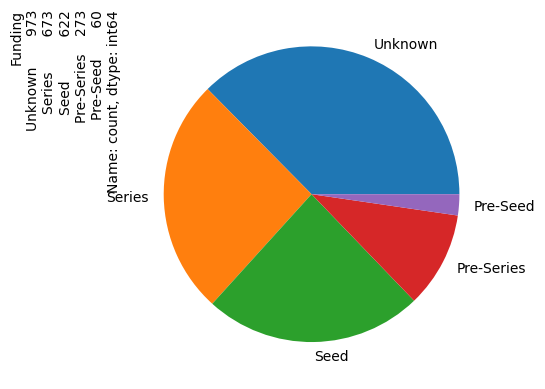

In [457]:
# To check the different Stages

Stages= df_combine['Funding'].value_counts()[:5]

Stages.plot(kind='pie')
plt.ylabel(Stages,loc='top')
plt.show();


## To check the top sectors 

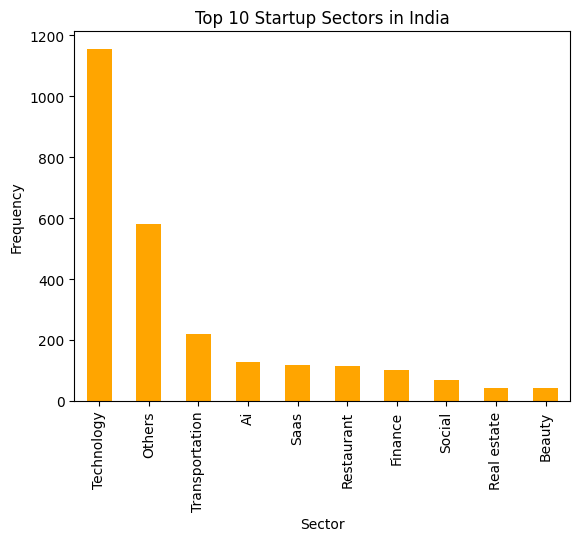

In [462]:
# To check the top sectors 
df_combine['Category']= df_combine['Category'].str.capitalize()
top_10_sectors =(df_combine['Category'].value_counts()).iloc[:10]

top_10_sectors.plot(kind='bar',color='orange')
plt.xlabel('Sector',loc='center')
plt.ylabel('Frequency')
plt.title('Top 10 Startup Sectors in India')
plt.show();

C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


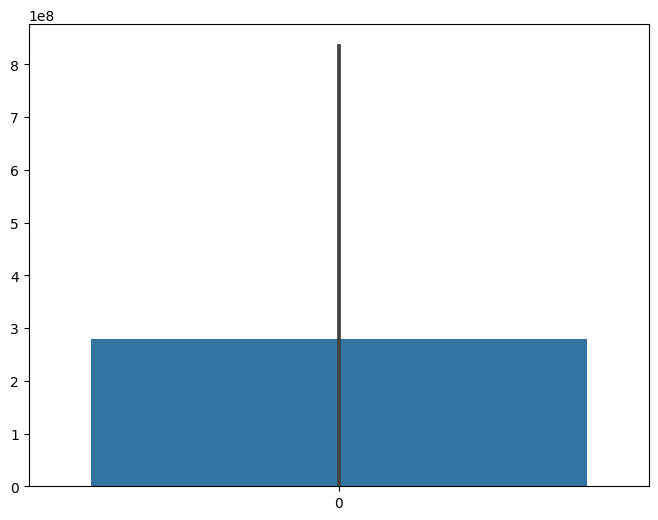

In [464]:
Top_Headquarters = df_combine.groupby('HeadQuarter')['Amount($)'].sum()[:10]
Top_Headquarters.sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=Top_Headquarters);

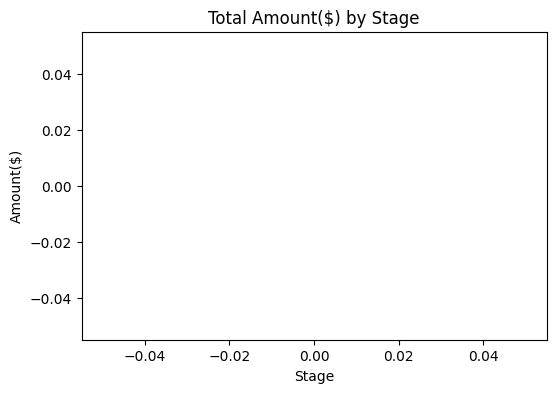

In [471]:
import matplotlib.pyplot as plt

Stage = df_combine.groupby('Category')['Amount($)'].sum()

plt.figure(figsize=(6,4))
plt.plot(data='Stage')
plt.xlabel('Stage')
plt.ylabel('Amount($)')
plt.title('Total Amount($) by Stage')
plt.show()
